In [1]:
#### SET UP IN SETTING AND POTENTIAL THE DT LIST AND PARA OF THE POTENTIAL 
#### SET UP THE PATH TO THE DATA OF INTEREST 
## hard problem generated on lap top 
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate

import pandas as pd
font_size=25
lw=4
myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 


In [2]:
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation")

from settings_and_potential import *
dtlist

array([0.011109  , 0.01831564, 0.03019738, 0.04978707, 0.082085  ,
       0.13533528, 0.22313016, 0.36787944, 0.60653066])

In [3]:
### OWN RESULTS 
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/data_overdamped")

dta_noada = pd.DataFrame()
dta_tr = pd.DataFrame()
dta_re = pd.DataFrame()
dta_g = pd.DataFrame()

for i in range(len(dtlist)):
    dti=dtlist[i]
    file_i = "vec_noadai="+str(i)+".txt"
    x_noada=np.hstack(openCfile(file_i))
    file_i = "vec_tri="+str(i)+".txt"
    x_tr=np.hstack(openCfile(file_i))
    file_i = "vec_gi="+str(i)+".txt"
    x_g=np.hstack(openCfile(file_i))
    
    # file_i = "data_hard_a3/vec_rei="+str(i)+".txt"
    # x_re=np.hstack(openCfile(file_i))

    dta_noada["x"+str(i)] = x_noada
    dta_tr["x"+str(i)] = x_tr
    dta_g["x"+str(i)] = x_g

    # dta_re["x"+str(i)] = x_re

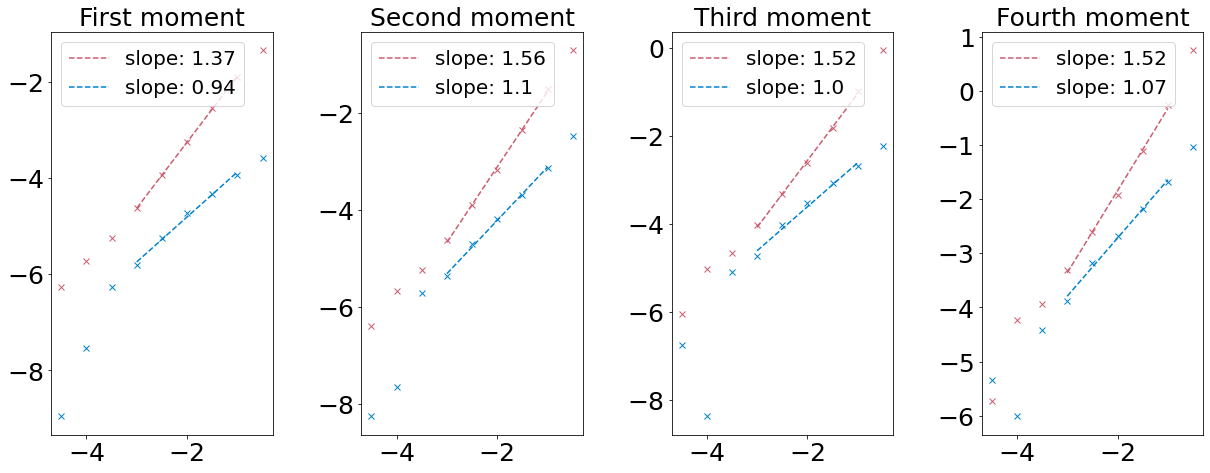

In [6]:
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-10,10]
# os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/visualisation")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
lb=3
ub=-1
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(20,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax1.set_title("First moment",fontsize=font_size)
ax2.set_title("Second moment",fontsize=font_size)
ax3.set_title("Third moment",fontsize=font_size)
ax4.set_title("Fourth moment",fontsize=font_size)

## no adaptive 
###############
lab="Overdamped"
mom1_list,mom2_list,mom3_list,mom4_list,mom_1_plussd,mom_2_plussd,mom_3_plussd,mom_4_plussd=moment_list(dtlist,tau,dta_noada,range_int)
ax1.plot(xm,np.log(mom1_list),"x",color=myred)
ax2.plot(xm,np.log(mom2_list),"x",color=myred)
ax3.plot(xm,np.log(mom3_list),"x",color=myred)
ax4.plot(xm,np.log(mom4_list),"x",color=myred)

## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list)[lb:ub], rcond=None)[0]
ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list)[lb:ub], rcond=None)[0]
ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)
#fourth moment
m, c = np.linalg.lstsq(A, np.log(mom4_list)[lb:ub], rcond=None)[0]
ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myred)


## Transformed 
###############
# lab="Transformed overdamped"
mom1_list,mom2_list,mom3_list,mom4_list,mom_1_plussd,mom_2_plussd,mom_3_plussd,mom_4_plussd=moment_list(dtlist,tau,dta_tr,range_int)
ax1.plot(xm,np.log(mom1_list),"x",color=myblue)
ax2.plot(xm,np.log(mom2_list),"x",color=myblue)
ax3.plot(xm,np.log(mom3_list),"x",color=myblue)
ax4.plot(xm,np.log(mom4_list),"x",color=myblue)


## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list)[lb:ub], rcond=None)[0]
ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list)[lb:ub], rcond=None)[0]
ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#fourth moment
m, c = np.linalg.lstsq(A, np.log(mom4_list)[lb:ub], rcond=None)[0]
ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)


ax1.legend(fontsize=font_size*0.8,ncol=1,loc="upper left")#,bbox_to_anchor=(1.5, 1.3))
ax2.legend(fontsize=font_size*0.8,ncol=1,loc="upper left")#,bbox_to_anchor=(1.5, 1.3))
ax3.legend(fontsize=font_size*0.8,ncol=1,loc="upper left")#,bbox_to_anchor=(1.5, 1.3))
ax4.legend(fontsize=font_size*0.8,ncol=1,loc="upper left")#,bbox_to_anchor=(1.5, 1.3))


fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation/figures/moments_logplot.png")



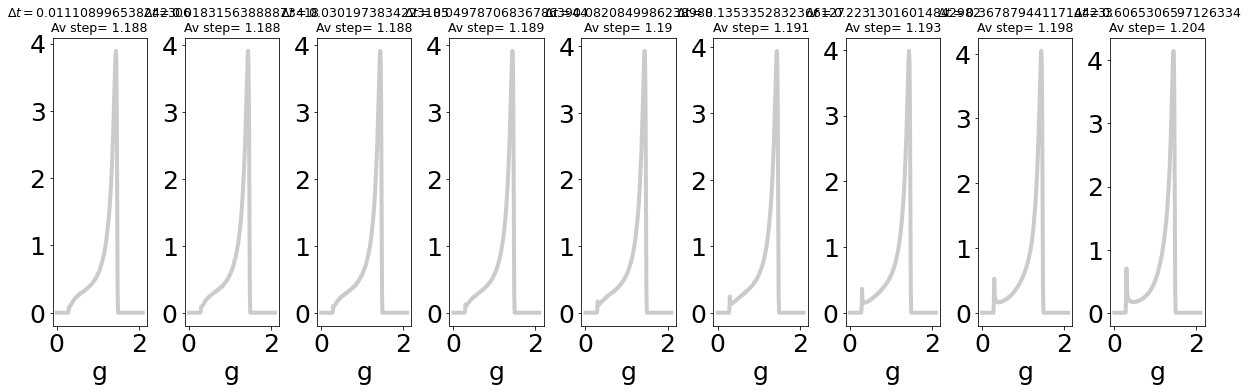

In [7]:


# #########################################
# ## Values of g taken at final time 
###########################################
fig, (axs)= plt.subplots(1,len(dtlist),figsize=(20,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

#######################
## Histograms g vals ## 
#######################
M=2
nbins=200
range_bins_g=[0,M+0.1]

for i in range(len(dtlist)):
    g=dta_g["x"+str(i)]
    histogram_g,bins = np.histogram(g,bins=nbins,range=range_bins_g, density=True)
    midx_noada = (bins[0:-1]+bins[1:])/2
    mean_g=round(np.mean(g),3)

    axs[i].plot(midx_noada,histogram_g,linewidth=lw,label=str(mean_g),color=mygrey)
    # axs[i].hist(histogram_g,linewidth=lw,label=str(mean_g),color=mygrey)
    axs[i].set_title("$\\Delta t=$"+str(dtlist[i])+"\nAv step= "+str(mean_g), fontsize=font_size/2)
    axs[i].set_xlabel("g", fontsize=font_size)
    # axs[i].legend(fontsize=font_size, loc="upper left")




In [12]:
np.round(np.linspace(-4.5,-0.5,15),2)

array([-4.5 , -4.21, -3.93, -3.64, -3.36, -3.07, -2.79, -2.5 , -2.21,
       -1.93, -1.64, -1.36, -1.07, -0.79, -0.5 ])